#Visualizing Dummy Data
##Dummy Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
X=np.array([1,2,3,4,5]).reshape(-1,1)
y=np.array([3,6,13,28,55])

#LinearRegression

In [ ]:
linear_model=LinearRegression()
linear_model.fit(X,y)
y_pred_linear=linear_model.predict(X)

#Polinomial Regression (degree 2)

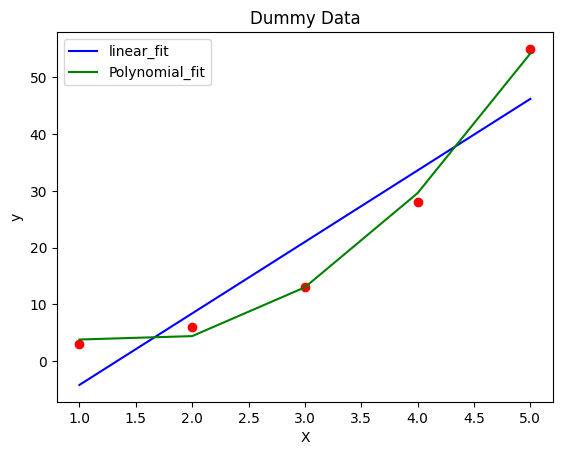

In [ ]:
poly=PolynomialFeatures(degree=2)
X_poly=poly.fit_transform(X)
poly_model=LinearRegression()
poly_model.fit(X_poly,y)
y_pred_poly=poly_model.predict(X_poly)
plt.scatter(X,y,color="red")
plt.plot(X,y_pred_linear,label="linear_fit",color="blue")
plt.plot(X,y_pred_poly,label="Polynomial_fit",color="green")
plt.title("Dummy Data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


#Real Dataset:Salary Prediction

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score


#Load dataset

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Salary_Data.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6701 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 104.9 KB


In [ ]:
df.isnull().sum()

,0
Years of Experience,3
Salary,5


In [ ]:
df.dropna(inplace=True)

#Train-test split

In [ ]:
X=df[["Years of Experience"]]
y=df["Salary"]
X_train,X_test,y_train,y_test=train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42)


#Linear Regression
##Train linear regresssion

In [ ]:
lin_model=LinearRegression()
lin_model.fit(X_train,y_train)
y_pred_lin=lin_model.predict(X_test)

##Metrics

In [ ]:
mse_lin=mean_squared_error(y_test,y_pred_lin)
rmse_lin=np.sqrt(mse_lin)
r2_lin=r2_score(y_test,y_pred_lin)
print("Linear Regression Metrics:")
print("MSE:",mse_lin)
print("RMSE:",rmse_lin)
print("R2 Score:",r2_lin)

Linear Regression Metrics:
MSE: 946833177.7094355
RMSE: 30770.654489455297
R2 Score: 0.6669549610495003


#Polynomial Regression (Degrees 2 and 4)
##Degree 2

In [ ]:
poly2 = PolynomialFeatures(degree=2)
X_train_poly2=poly2.fit_transform(X_train)
X_test_poly2=poly2.transform(X_test)
poly2_model=LinearRegression()
poly2_model.fit(X_train_poly2,y_train)
y_pred_poly2=poly2_model.predict(X_test_poly2)

In [ ]:
X_train_poly2

array([[  1.,   3.,   9.],
       [  1.,   6.,  36.],
       [  1.,  10., 100.],
       ...,
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   2.,   4.]])

In [ ]:
X_test_poly2








array([[ 1.,  2.,  4.],
       [ 1.,  8., 64.],
       [ 1.,  3.,  9.],
       ...,
       [ 1.,  1.,  1.],
       [ 1.,  3.,  9.],
       [ 1.,  0.,  0.]])

#Metrics

In [ ]:
mse_poly2=mean_squared_error(y_test,y_pred_poly2)
rmse_poly2=np.sqrt(mse_poly2)
r2_poly2=r2_score(y_test,y_pred_poly2)

##Degree 4

In [ ]:
poly4=PolynomialFeatures(degree=4)
X_train_poly4=poly4.fit_transform(X_train)
X_test_poly4=poly4.transform(X_test)
poly4_model=LinearRegression()
poly4_model.fit(X_train_poly4,y_train)
y_pred_poly4=poly4_model.predict(X_test_poly4)
X_train_poly4

array([[1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04],
       ...,
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01]])

In [ ]:
X_test_poly4

array([[1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       ...,
       [1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]])

#Metrics

In [ ]:
mse_poly4=mean_squared_error(y_test,y_pred_poly4)
rmse_poly4=np.sqrt(mse_poly4)
r2_poly4=r2_score(y_test,y_pred_poly4)
print("\nPolynomial Regression (Degree 2) Metrics:")
print("MSE:",mse_poly2)
print("RMSE:",rmse_poly2)
print("R2 Score:",r2_poly2)
print("\nPolynomial Regression (Degree 4) Metrics:")
print("MSE:",mse_poly4)
print("RMSE:",rmse_poly4)
print("R2 Score:",r2_poly4)


Polynomial Regression (Degree 2) Metrics:
MSE: 726857249.7211918
RMSE: 26960.290238074067
R2 Score: 0.7443306732971963

Polynomial Regression (Degree 4) Metrics:
MSE: 720033651.6859531
RMSE: 26833.44278481524
R2 Score: 0.7467308484568018


#Visualization of all methods

NameError: name 'y_range_poly4' is not defined

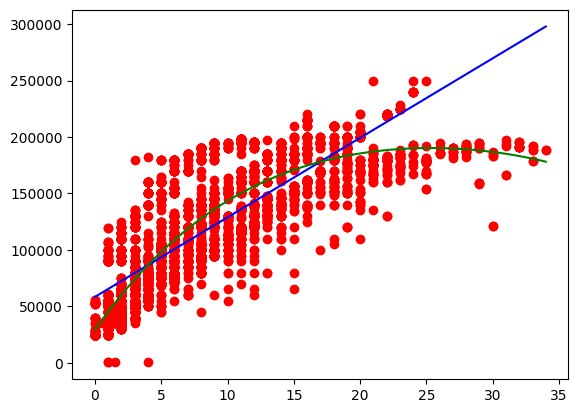

In [ ]:
X_range=np.linspace(X.min(),X.max(),100).reshape(-1,1)
#Create Dataframe with coloumn name
X_range_df=pd.DataFrame(X_range,columns=["Years of Experience"])
#Transform using polynomial features
X_range_poly2=poly2.transform(X_range_df)
X_range_poly4=poly4.transform(X_range_df)
#predict using models
y_range_lin=lin_model.predict(X_range_df)
y_range_poly2=poly2_model.predict(X_range_poly2)
y_range_poly2=poly4_model.predict(X_range_poly4)
#Plot
plt.scatter(X,y,color="red",label="Actual Data")
plt.plot(X_range,y_range_lin, label="Linear Model",color="blue",)
plt.plot(X_range,y_range_poly2,label="PolynomialFit (Degree 2)",color="green")
plt.plot(X_range,y_range_poly4,label="Polynomial Fit (Degree 4)",color="orange")
plt.title("Salary Prediction")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()



##Model performance comparison

In [ ]:
metrics_df=pd.DataFrame({
    "Model":["Linear","Polynomial (Degree 2)","Polynomial (Degree 4)"],
    "MSE":[mse_lin,mse_poly2,mse_poly4],
    "RMSE":[rmse_lin,rmse_poly2,rmse_poly4],
    "R2 Score":[r2_lin,r2_poly2,r2_poly4]
})
metrics_df.style.format({
    "MSE":"{:.2f}",
    "RMSE":"{:.2f}",
    "R2 Score":"{:.4f}"

})

,Model,MSE,RMSE,R2 Score
0,Linear,946833177.71,30770.65,0.6670
1,Polynomial (Degree 2),726857249.72,26960.29,0.7443
2,Polynomial (Degree 4),720033651.69,26833.44,0.7467
